In [1]:
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import networkx as nx
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import igraph as ig
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
from modutils import mod_calc
device = torch.device('cpu')

In [2]:
G = nx.read_gml("datasets/dolphins.gml", label = 'id')
print(nx.info(G))
comm_dict = partition(G)
clusters_number = len(np.array(list(set(comm_dict.values())))) #set the number of clusters required here

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290


In [3]:
A_hat = nx.adjacency_matrix(G).todense()
X = np.identity(G.number_of_nodes(), dtype=np.float)  

In [4]:
class CDCGS(nn.Module):
    def __init__(self, A_hat, num_feat, num_hidden):
        super(CDCGS, self).__init__()
        self.num_feat = num_feat
        self.num_hidden = num_hidden
        self.A_hat = A_hat
        self.W_0 = nn.Parameter(torch.ones(num_feat, num_hidden))
        I = F.one_hot(torch.tensor(random.sample(range(0, num_feat), num_feat)), num_classes=num_feat)
        self.I = torch.tensor(I,dtype=torch.float)

    def forward(self, X, A_hat,temp):
        global featureSelector
        global weight_feature
        featureSelector = self.W_0
        results = torch.zeros(self.W_0.size())
        x = 500
        for i in range(x):
            results += F.gumbel_softmax(self.W_0,tau=temp,hard=False)
        weight_feature = results/x

        H = torch.mm(torch.mm(self.I,A_hat),self.I.T)
        H = torch.mm(torch.mm(weight_feature.T,A_hat),weight_feature)
        H = torch.div(H, H.sum(axis=0))
        m = nn.Softmax(dim=0)
        return m(H)

num_feat = len(G.nodes())
num_hidden = clusters_number

model = CDCGS(A_hat, num_feat, num_hidden).to(device)

def lossFn(output,exp): 
    return torch.sum((torch.diag(-torch.log(output))))

optimizer = optim.Adam(model.parameters(),lr=2e-2,weight_decay=0,betas=(0.5, 0.999), eps=1e-08)

A_hat_tensor = torch.Tensor(A_hat).to(device)
X_tensor = torch.Tensor(X).to(device)

loss_hist = []
acc_hist = []
temp = 3

for epoch in range(650):
    model.train()
    model.zero_grad()
    if(epoch == 75):
        temp = 2.5
    elif(epoch == 900):
        temp = 2
    elif(epoch == 150):
        temp = 2
    elif(epoch == 200):
        temp = 1.75
    elif(epoch == 250):
        temp = 1.5
    elif(epoch == 300):
        temp = 1.2
    elif(epoch == 350):
        temp = 1
    elif(epoch == 400):
        temp = 0.75
    elif(epoch == 450):
        temp = 0.5
    elif(epoch == 475):
        temp = 0.25
    elif(epoch == 525):
        temp = 0.1
    
    output = model(X_tensor, A_hat_tensor,temp)
    loss = lossFn(output,torch.diag(torch.ones(output.size()[0])))
    loss_hist.append(loss.item())
    print('loss',epoch,loss)
    loss.backward()
    optimizer.step()


/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


loss 0 tensor(5.5452, grad_fn=<SumBackward0>)
loss 1 tensor(5.5452, grad_fn=<SumBackward0>)
loss 2 tensor(5.5451, grad_fn=<SumBackward0>)
loss 3 tensor(5.5452, grad_fn=<SumBackward0>)
loss 4 tensor(5.5450, grad_fn=<SumBackward0>)
loss 5 tensor(5.5450, grad_fn=<SumBackward0>)
loss 6 tensor(5.5447, grad_fn=<SumBackward0>)
loss 7 tensor(5.5445, grad_fn=<SumBackward0>)
loss 8 tensor(5.5439, grad_fn=<SumBackward0>)
loss 9 tensor(5.5435, grad_fn=<SumBackward0>)
loss 10 tensor(5.5430, grad_fn=<SumBackward0>)
loss 11 tensor(5.5421, grad_fn=<SumBackward0>)
loss 12 tensor(5.5412, grad_fn=<SumBackward0>)
loss 13 tensor(5.5400, grad_fn=<SumBackward0>)
loss 14 tensor(5.5384, grad_fn=<SumBackward0>)
loss 15 tensor(5.5371, grad_fn=<SumBackward0>)
loss 16 tensor(5.5355, grad_fn=<SumBackward0>)
loss 17 tensor(5.5334, grad_fn=<SumBackward0>)
loss 18 tensor(5.5319, grad_fn=<SumBackward0>)
loss 19 tensor(5.5283, grad_fn=<SumBackward0>)
loss 20 tensor(5.5274, grad_fn=<SumBackward0>)
loss 21 tensor(5.5241, 

loss 173 tensor(3.9412, grad_fn=<SumBackward0>)
loss 174 tensor(3.9356, grad_fn=<SumBackward0>)
loss 175 tensor(3.9346, grad_fn=<SumBackward0>)
loss 176 tensor(3.9304, grad_fn=<SumBackward0>)
loss 177 tensor(3.9287, grad_fn=<SumBackward0>)
loss 178 tensor(3.9250, grad_fn=<SumBackward0>)
loss 179 tensor(3.9219, grad_fn=<SumBackward0>)
loss 180 tensor(3.9171, grad_fn=<SumBackward0>)
loss 181 tensor(3.9163, grad_fn=<SumBackward0>)
loss 182 tensor(3.9128, grad_fn=<SumBackward0>)
loss 183 tensor(3.9100, grad_fn=<SumBackward0>)
loss 184 tensor(3.9093, grad_fn=<SumBackward0>)
loss 185 tensor(3.9035, grad_fn=<SumBackward0>)
loss 186 tensor(3.9016, grad_fn=<SumBackward0>)
loss 187 tensor(3.9009, grad_fn=<SumBackward0>)
loss 188 tensor(3.8958, grad_fn=<SumBackward0>)
loss 189 tensor(3.8930, grad_fn=<SumBackward0>)
loss 190 tensor(3.8893, grad_fn=<SumBackward0>)
loss 191 tensor(3.8874, grad_fn=<SumBackward0>)
loss 192 tensor(3.8867, grad_fn=<SumBackward0>)
loss 193 tensor(3.8860, grad_fn=<SumBack

loss 345 tensor(3.6666, grad_fn=<SumBackward0>)
loss 346 tensor(3.6671, grad_fn=<SumBackward0>)
loss 347 tensor(3.6665, grad_fn=<SumBackward0>)
loss 348 tensor(3.6669, grad_fn=<SumBackward0>)
loss 349 tensor(3.6678, grad_fn=<SumBackward0>)
loss 350 tensor(3.6608, grad_fn=<SumBackward0>)
loss 351 tensor(3.6614, grad_fn=<SumBackward0>)
loss 352 tensor(3.6610, grad_fn=<SumBackward0>)
loss 353 tensor(3.6615, grad_fn=<SumBackward0>)
loss 354 tensor(3.6610, grad_fn=<SumBackward0>)
loss 355 tensor(3.6608, grad_fn=<SumBackward0>)
loss 356 tensor(3.6610, grad_fn=<SumBackward0>)
loss 357 tensor(3.6611, grad_fn=<SumBackward0>)
loss 358 tensor(3.6612, grad_fn=<SumBackward0>)
loss 359 tensor(3.6606, grad_fn=<SumBackward0>)
loss 360 tensor(3.6606, grad_fn=<SumBackward0>)
loss 361 tensor(3.6612, grad_fn=<SumBackward0>)
loss 362 tensor(3.6614, grad_fn=<SumBackward0>)
loss 363 tensor(3.6608, grad_fn=<SumBackward0>)
loss 364 tensor(3.6611, grad_fn=<SumBackward0>)
loss 365 tensor(3.6599, grad_fn=<SumBack

loss 517 tensor(3.6568, grad_fn=<SumBackward0>)
loss 518 tensor(3.6563, grad_fn=<SumBackward0>)
loss 519 tensor(3.6569, grad_fn=<SumBackward0>)
loss 520 tensor(3.6565, grad_fn=<SumBackward0>)
loss 521 tensor(3.6567, grad_fn=<SumBackward0>)
loss 522 tensor(3.6561, grad_fn=<SumBackward0>)
loss 523 tensor(3.6563, grad_fn=<SumBackward0>)
loss 524 tensor(3.6563, grad_fn=<SumBackward0>)
loss 525 tensor(3.6569, grad_fn=<SumBackward0>)
loss 526 tensor(3.6563, grad_fn=<SumBackward0>)
loss 527 tensor(3.6566, grad_fn=<SumBackward0>)
loss 528 tensor(3.6561, grad_fn=<SumBackward0>)
loss 529 tensor(3.6564, grad_fn=<SumBackward0>)
loss 530 tensor(3.6562, grad_fn=<SumBackward0>)
loss 531 tensor(3.6567, grad_fn=<SumBackward0>)
loss 532 tensor(3.6565, grad_fn=<SumBackward0>)
loss 533 tensor(3.6560, grad_fn=<SumBackward0>)
loss 534 tensor(3.6561, grad_fn=<SumBackward0>)
loss 535 tensor(3.6565, grad_fn=<SumBackward0>)
loss 536 tensor(3.6567, grad_fn=<SumBackward0>)
loss 537 tensor(3.6561, grad_fn=<SumBack

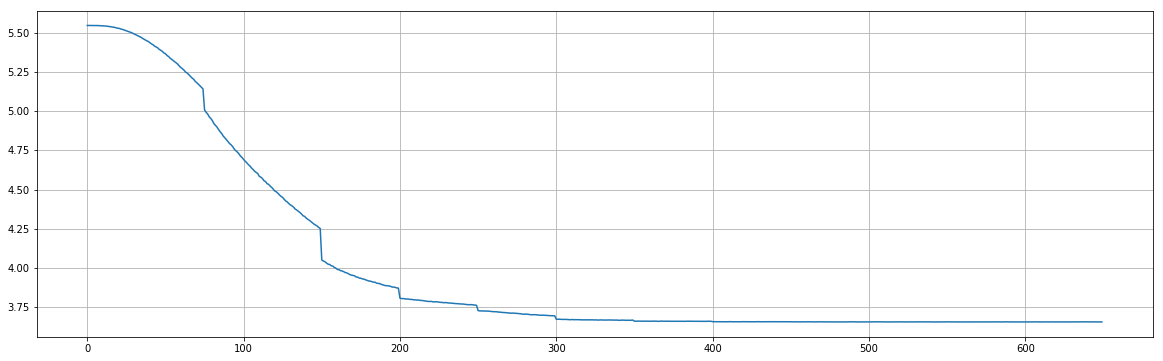

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(loss_hist)
plt.grid(True)
plt.show()

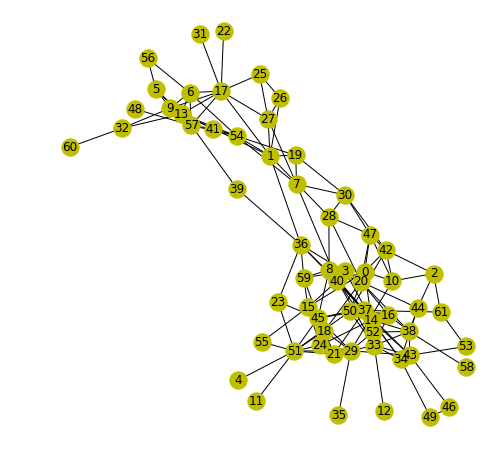

Calculating modularity for undirected graph
Modularity for Dolphin dataset is 0.52377


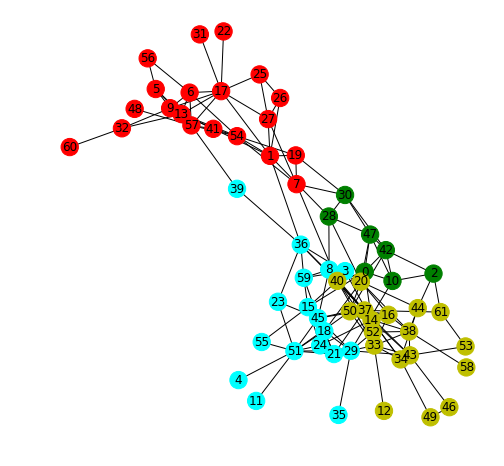

In [10]:
gumbel_matrix = weight_feature.detach().max(dim=1)[1]
labels_pred = gumbel_matrix.data.numpy()
    
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_color="y",node_size=300, with_labels=True)
plt.show()

color = []
for c in range(len(gumbel_matrix)):
    if(gumbel_matrix[c] == 0):
        color.append('r')
    elif(gumbel_matrix[c] == 1):
        color.append('g')
    elif(gumbel_matrix[c] == 2):
        color.append('aqua')
    elif(gumbel_matrix[c] == 3):
        color.append('y')
print('Modularity for Dolphin dataset is %.5f' %get_modularity(G,labels_pred))

plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_size=300, node_color=color, with_labels=True)
plt.show()